# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Loading the Data

In [4]:
df = pd.read_csv('/content/coca cola Dataset.csv')

# Basic Info about the Data

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=15096, step=1)

In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


In [11]:
df.shape

(15096, 7)

# Exploratory Data Analysis (EDA)

In [12]:
print((df.info))

<bound method DataFrame.info of              Date       Open       High        Low      Close  Adj Close  \
0      1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133   
1      1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   
2      1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374   
3      1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   
4      1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   
...           ...        ...        ...        ...        ...        ...   
15091  2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998   
15092  2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999   
15093  2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001   
15094  2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002   
15095  2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000   

         Volume  
0        806400  
1       1574400  
2

In [14]:
print((df.describe))

<bound method NDFrame.describe of              Date       Open       High        Low      Close  Adj Close  \
0      1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133   
1      1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   
2      1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374   
3      1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   
4      1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   
...           ...        ...        ...        ...        ...        ...   
15091  2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998   
15092  2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999   
15093  2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001   
15094  2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002   
15095  2021-12-17  58.490002  58.919998  57.700001  57.730000  57.730000   

         Volume  
0        806400  
1       1574400  

In [15]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Visualization and Preprocessing

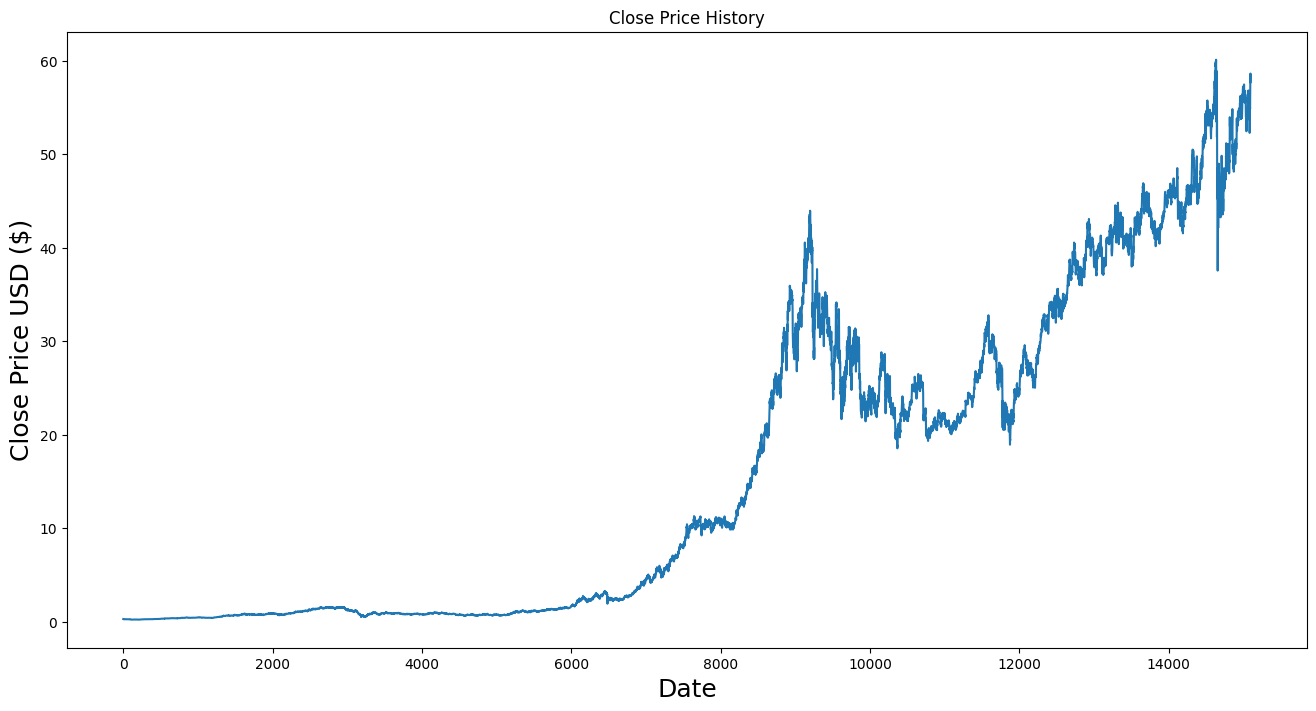

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
#Using the "CLOSE" column for prediction

data = df.filter(['Close'])
dataset = data.values

# Decision Tree Regressor Model

In [41]:
# Preparing the data for Decision Tree Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values


In [43]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
# Training the Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
# Predicting and evaluating the Decision Tree model
dtr_predictions = dtr_model.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 15.709184025994118


# Results

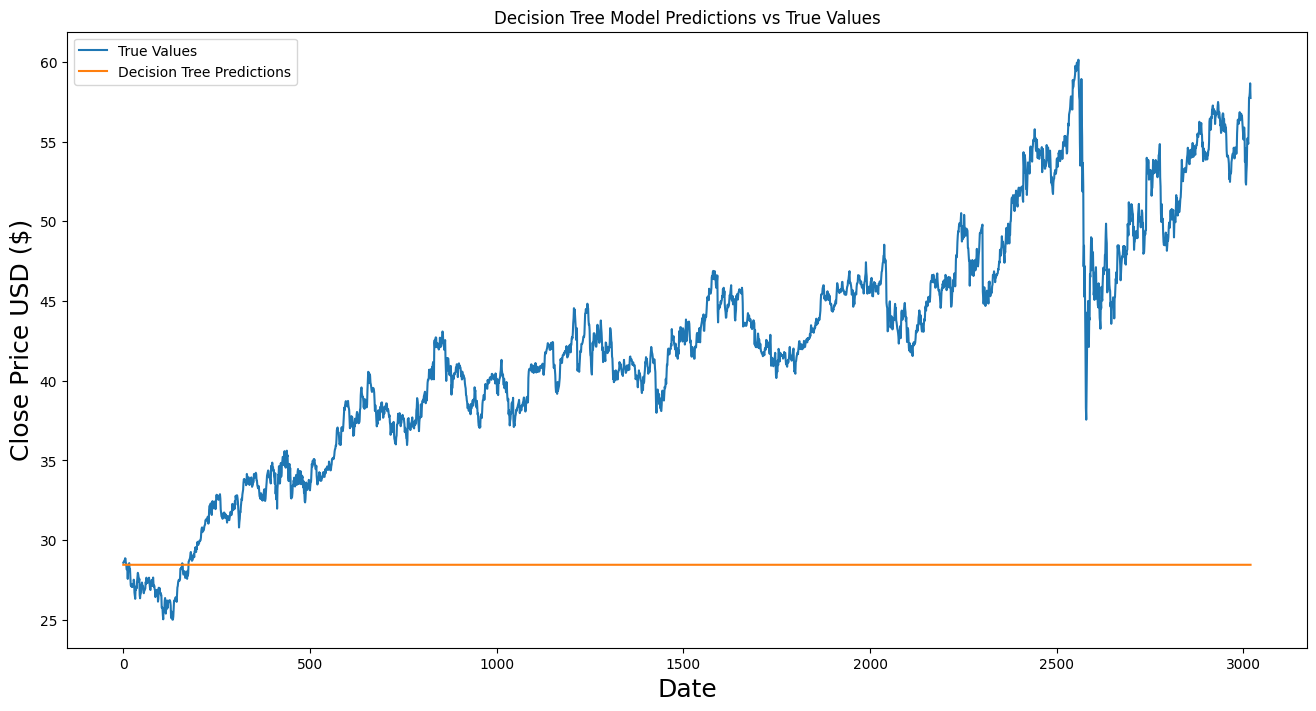

In [46]:
# Visualizing the Results for Decision Tree
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()